First we have to read the file

Then delete unnecessary columns

Then we need to build signals

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab
import numpy as np

In [2]:
file = 'DataSetFile.xlsx'

columnName = []
for i in range(3406):
    name = "col" + str(i)
    columnName.append(name)
    
df = pd.read_excel(file, header = None, names=columnName)
df.head()

,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,...,col3396,col3397,col3398,col3399,col3400,col3401,col3402,col3403,col3404,col3405
0,X,1,51,5717,23,3400,-0.001024,-0.001280,-0.001408,-0.001152,...,-0.215406,-0.216430,-0.214510,-0.208367,-0.199024,-0.186097,-0.169842,-0.150644,-0.129269,-0.105847
1,X,1,51,5717,23,3400,-0.000640,-0.000768,-0.000896,-0.000768,...,-0.220910,-0.222958,-0.221422,-0.215534,-0.207215,-0.194928,-0.179569,-0.160755,-0.139637,-0.116214
2,X,1,51,5716,23,3400,-0.001280,-0.001280,-0.001280,-0.001280,...,-0.224238,-0.224750,-0.221166,-0.213742,-0.202991,-0.188657,-0.170866,-0.150516,-0.127862,-0.103160
3,X,1,51,5717,23,3400,-0.000384,-0.000640,-0.000768,-0.000896,...,-0.212463,-0.208239,-0.201711,-0.190960,-0.177521,-0.160883,-0.141428,-0.118902,-0.094968,-0.069114
4,X,1,51,5716,23,3400,-0.001408,-0.001024,-0.000640,-0.000512,...,-0.216942,-0.213998,-0.206703,-0.196208,-0.182385,-0.165490,-0.145780,-0.123894,-0.099448,-0.073466


As there is no column name we have to give some column names

Then we have to delete first 5 columns

In [3]:
df.tail()
df1 = df.drop(columns=["col0", "col1", "col2", "col3", "col4", "col5"])
df1.head()

,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,...,col3396,col3397,col3398,col3399,col3400,col3401,col3402,col3403,col3404,col3405
0,-0.001024,-0.001280,-0.001408,-0.001152,-0.000384,-0.000512,-0.000256,-0.000256,-0.000768,-0.001280,...,-0.215406,-0.216430,-0.214510,-0.208367,-0.199024,-0.186097,-0.169842,-0.150644,-0.129269,-0.105847
1,-0.000640,-0.000768,-0.000896,-0.000768,-0.001024,-0.000768,0.000000,-0.000256,-0.000384,0.000256,...,-0.220910,-0.222958,-0.221422,-0.215534,-0.207215,-0.194928,-0.179569,-0.160755,-0.139637,-0.116214
2,-0.001280,-0.001280,-0.001280,-0.001280,-0.001024,-0.001024,-0.000256,-0.000128,0.000000,-0.000256,...,-0.224238,-0.224750,-0.221166,-0.213742,-0.202991,-0.188657,-0.170866,-0.150516,-0.127862,-0.103160
3,-0.000384,-0.000640,-0.000768,-0.000896,-0.000512,-0.000256,0.000384,0.000128,0.000128,-0.000128,...,-0.212463,-0.208239,-0.201711,-0.190960,-0.177521,-0.160883,-0.141428,-0.118902,-0.094968,-0.069114
4,-0.001408,-0.001024,-0.000640,-0.000512,0.000000,-0.000128,-0.000640,-0.000256,0.000256,0.000256,...,-0.216942,-0.213998,-0.206703,-0.196208,-0.182385,-0.165490,-0.145780,-0.123894,-0.099448,-0.073466


Now we need to see the mean, standard deviation of the whole data set 

In [4]:
df1.describe()

,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,...,col3396,col3397,col3398,col3399,col3400,col3401,col3402,col3403,col3404,col3405
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,-0.001090,-0.001016,-0.000947,-0.000891,-0.000773,-0.000699,-0.000632,-0.000591,-0.000497,-0.000381,...,-0.184190,-0.180985,-0.174759,-0.165511,-0.153421,-0.138802,-0.121866,-0.102796,-0.082057,-0.059963
std,0.000840,0.000812,0.000818,0.000811,0.000735,0.000763,0.000809,0.000749,0.000721,0.000738,...,0.112184,0.114053,0.114199,0.112505,0.109028,0.103852,0.097138,0.088828,0.079314,0.068871
min,-0.005248,-0.005120,-0.005504,-0.005248,-0.004608,-0.004608,-0.004224,-0.003712,-0.003072,-0.003072,...,-0.233453,-0.234477,-0.231789,-0.228589,-0.220782,-0.209775,-0.196336,-0.183793,-0.167538,-0.148468
25%,-0.001376,-0.001280,-0.001152,-0.001152,-0.001024,-0.001024,-0.001152,-0.001024,-0.000864,-0.000640,...,-0.220878,-0.219886,-0.215214,-0.208207,-0.198224,-0.183281,-0.166258,-0.145780,-0.122294,-0.097144
50%,-0.001152,-0.000960,-0.000896,-0.000768,-0.000704,-0.000640,-0.000576,-0.000512,-0.000384,-0.000384,...,-0.216430,-0.213742,-0.206447,-0.196016,-0.182577,-0.166578,-0.147956,-0.126582,-0.102712,-0.077434
75%,-0.000768,-0.000672,-0.000640,-0.000512,-0.000384,-0.000288,-0.000128,-0.000128,-0.000032,0.000128,...,-0.212463,-0.207503,-0.198192,-0.185489,-0.169554,-0.150452,-0.128246,-0.103192,-0.077242,-0.050556
max,0.001152,0.001152,0.000896,0.000384,0.000512,0.000896,0.000896,0.000768,0.001408,0.001152,...,0.199664,0.206447,0.209903,0.210031,0.209263,0.206447,0.200688,0.190960,0.178545,0.162803


As per our data set there are 50 signals and each holding its data in a row

So we need to load these data in seperated variables to deal with

We can use object oriented system to deal with it

We have to create a class initiated with only data frame object

In this class a method will only have a for loop which will load each row in df and do other works

Now we look at all the highest peaks in each rows using the class

In [28]:
def thresholding_algo(dataArray, lag, threshold, influence):
    '''
    z-score algorithm
    To initialize this function the data has to be converted into a pandas array
    lag is to determine the smoothness and adaptiveness of the algorithm (from where the filter starts)
    threshold is to determine the least point from which new high value is counted (changes with signal pattern)
    influence is to select how much the current filter should rely on past learning of signal
    '''
    signals = np.zeros(len(dataArray))
    filteredData = np.array(dataArray)
    avgFilter = [0]*len(dataArray)
    stdFilter = [0]*len(dataArray)
    avgFilter[lag - 1] = np.mean(dataArray[0:lag])
    stdFilter[lag - 1] = np.std(dataArray[0:lag])
    for i in range(lag, len(dataArray)):
        if abs(dataArray[i] - avgFilter[i-1]) > threshold * stdFilter [i-1]:
            if dataArray[i] > avgFilter[i-1]:
                signals[i] = 1
            else:
                signals[i] = -1

            filteredData[i] = influence * dataArray[i] + (1 - influence) * filteredData[i-1]
            avgFilter[i] = np.mean(filteredData[(i-lag+1):i+1])
            stdFilter[i] = np.std(filteredData[(i-lag+1):i+1])
        else:
            signals[i] = 0
            filteredData[i] = dataArray[i]
            avgFilter[i] = np.mean(filteredData[(i-lag+1):i+1])
            stdFilter[i] = np.std(filteredData[(i-lag+1):i+1])
    
    unitLags = np.where(np.asarray(signals) == 1)

    return dict(signals = np.asarray(signals),
                avgFilter = np.asarray(avgFilter),
                stdFilter = np.asarray(stdFilter),
               unitLagPositions = unitLags)

In [29]:
highestPeaks = []
for i in range(len(df1)):
    b = df1.iloc[i]
    sortedIndexes = np.argsort(b)
    sortedArray = b[sortedIndexes]
    highestValue = sortedArray[-1 : ]
    highestPeaks.extend(highestValue.tolist())
print(highestPeaks)

[0.323940999999999, 0.320742, 0.324452999999999, 0.32023, 0.324068999999999, 0.321126, 0.323172999999999, 0.319846, 0.321765999999999, 0.318054, 0.322406, 0.323045999999999, 0.324068999999999, 0.328037, 0.344036, 0.319334, 0.327525, 0.325348999999999, 0.326757, 0.316261999999999, 0.316774, 0.321894, 0.319589999999999, 0.321894, 0.330340999999999, 0.322533999999999, 0.323172999999999, 0.324709, 0.324324999999999, 0.32151, 0.322533999999999, 0.324965, 0.316261999999999, 0.325093, 0.317541999999999, 0.31895, 0.326373, 0.319846, 0.319205999999999, 0.320485999999999, 0.322662, 0.32151, 0.321126, 0.320998, 0.329957, 0.320869999999999, 0.32023, 0.321894, 0.316006, 0.320101999999999]


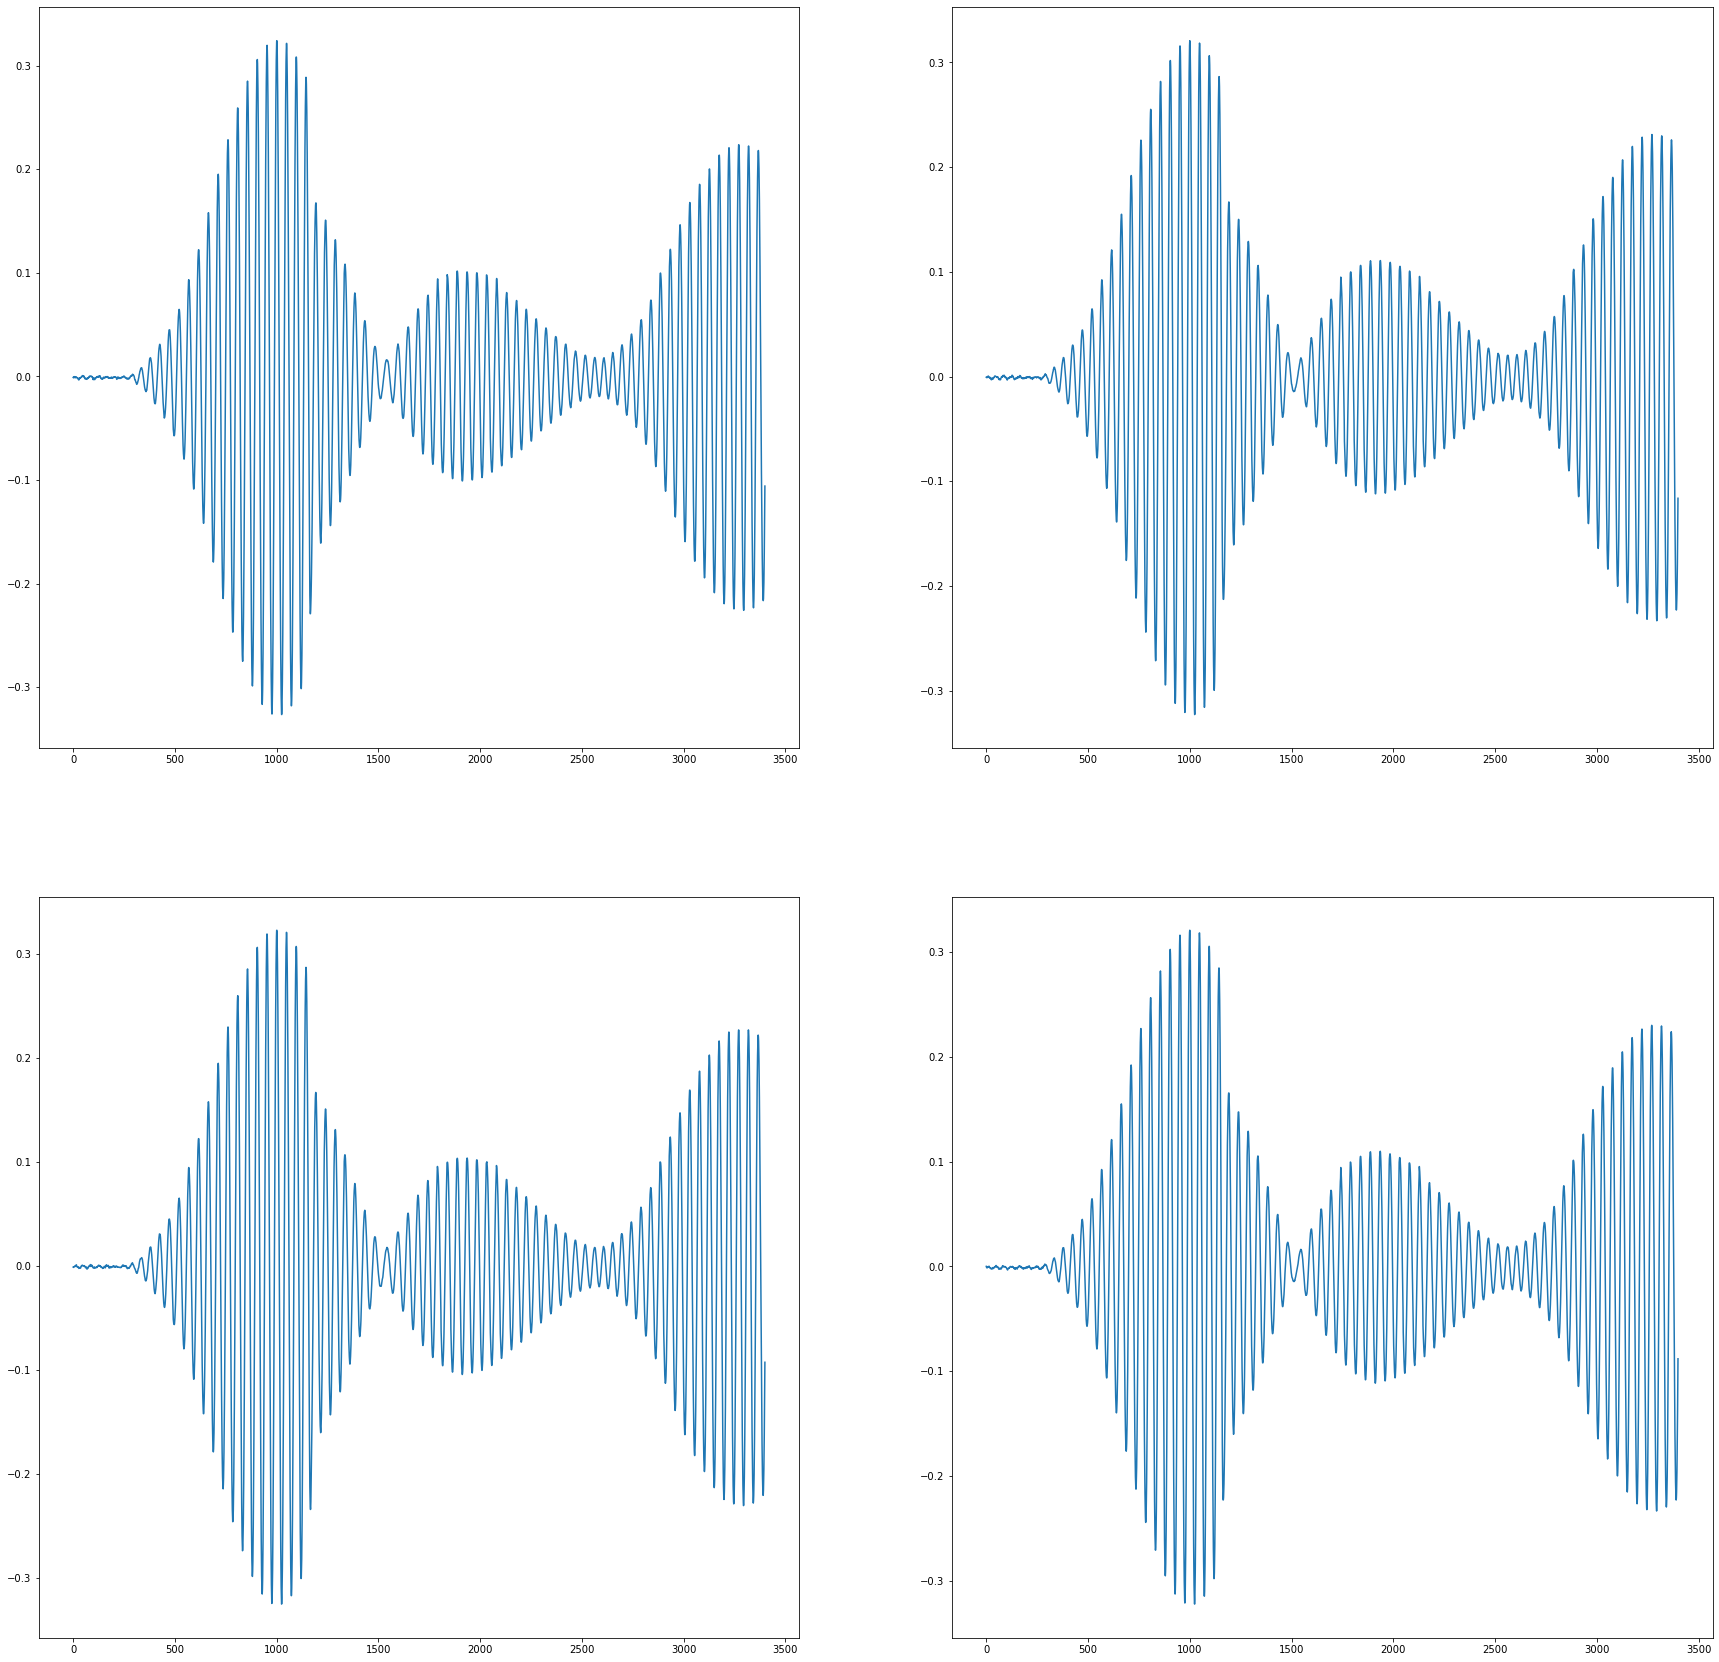

In [30]:
y = df1.iloc[0]
y1 = df1.iloc[1]
y2 = df1.iloc[40]
y3 = df1.iloc[45]
y4 = df1.iloc[25]
y5 = df1.iloc[20]
y6 = df1.iloc[35]
y7 = df1.iloc[31]

x = np.arange(3400)
plt.figure(figsize=(30,30))
plt.subplot(2,2,1) 
plt.plot(x, y)
plt.subplot(2,2,2)
plt.plot(x, y1)
plt.subplot(2,2,3)
plt.plot(x, y2)
plt.subplot(2,2,4)
plt.plot(x, y3)


In [31]:
print(df1.loc[0, ['col1000','col1001','col1002','col1003','col1004','col1005','col1006','col1007','col1008','col1009','col1010','col1011','col1012','col1013', 'col1100', 'col1026', 'col1032']])

col1000    0.210287
col1001    0.240236
col1002    0.265962
col1003    0.287720
col1004    0.304743
col1005    0.316390
col1006    0.323173
col1007    0.323941
col1008    0.319334
col1009    0.309735
col1010    0.294248
col1011    0.274154
col1012    0.248684
col1013    0.218862
col1100    0.292968
col1026   -0.269674
col1032   -0.321382
Name: 0, dtype: float64


In [32]:
arr2= np.array([-0.2,0.15,0.35,0.12,0.65,-0.55,-0.9,-0.2,0.32,0.45,0.22,0.87,0.55,0.44,0.11,0.75,0.32,0.25,0.11,0.33,0.77,
               0.66,0.88,0.25,0.75,0.58,0.64,0.66,0.12,0.32,0.45])
arr = arr2[arr2 >= 0]
sortedIndexes = np.argsort(arr)
sortedArray = arr[sortedIndexes]
highestValues = sortedArray[-5 : ]
average = np.average(highestValues)
print(arr)
print(highestValues)
print(average)

[0.15 0.35 0.12 0.65 0.32 0.45 0.22 0.87 0.55 0.44 0.11 0.75 0.32 0.25
 0.11 0.33 0.77 0.66 0.88 0.25 0.75 0.58 0.64 0.66 0.12 0.32 0.45]
[0.75 0.75 0.77 0.87 0.88]
0.804


In [33]:
class SignalManipulation():
    def __init__(self, array, numberofPeakstoConsider, noiseAmplitude):
        '''
        Initiate this class with an array which is a row of data or in our case a full signal
        '''
        self.data = array
        self.numberOfHighestPeaks = numberofPeakstoConsider
        self.noiseAmp = noiseAmplitude
        
    def find_threshold(self):
        arr1 = self.data
        arr = arr1[arr1 >= 0]
        sortedIndexes = np.argsort(arr)
        sortedArray = arr[sortedIndexes]
        highestValues = sortedArray[-self.numberOfHighestPeaks : ]
        average = np.average(highestValues)
        return average
    
    def find_lag(self):
        arr = np.where(self.data >= self.noiseAmp, 1, 0)
        # Create an array that is 1 where a is 0, and pad each end with an extra 0.
        iszero = np.concatenate(([0], np.equal(arr, 0).view(np.int8), [0]))
        absdiff = np.abs(np.diff(iszero))
        # Runs start and end where absdiff is 1.
        ranges = np.where(absdiff == 1)[0].reshape(-1, 2)
        return ranges[0,1] - 1 

In [34]:
sm = SignalManipulation(y, 3, 0.1)
a = sm.find_threshold
b = sm.find_lag()
print(a)
print(b)

<bound method SignalManipulation.find_threshold of <__main__.SignalManipulation object at 0x00000184CE0D4A90>>
611


In [35]:
B = np.where( (A >= 0.1) & (A <= 0.2), 0.001, A)
C = np.where( (B > 0.2) & (B <= 0.3), 0.005, B)
D = np.where( (C > 0.3) & (C <= 0.31), 1, C)
E = np.where( (D > 0.31) & (D <= 0.32), 10, D)
F = np.where( (E > 0.32) & (E <= 0.321), 100, E)
G = np.where( (F > 0.321) & (F <= 0.322), 1000, F)
H = np.where( (G > 0.322) & (G <= 0.323), 10000, G)
I = np.where( (H > 0.323) & (H <= 0.324), 100000, H)
J = np.where( (I > 0.324) & (I <= 0.325), 1000000, I)
K = np.where( (J > 0.325) & (J <= 0.326), 10000000, J)
L = np.where( (G> 0.326), 100000000, K) 

(array([ 904,  905,  906,  955,  998, 1003, 1046], dtype=int64),)


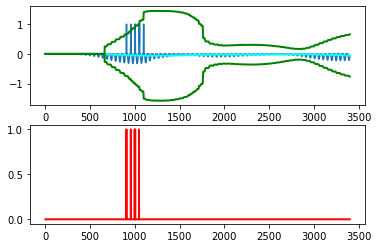

In [39]:
lag = 662
threshold = 10
influence = 0.1
result = thresholding_algo(D, lag=lag, threshold=threshold, influence=influence)
print(result["unitLagPositions"])
# Plot result
pylab.subplot(211)
pylab.plot(np.arange(1, len(y)+1), D)

pylab.plot(np.arange(1, len(D)+1),
           result["avgFilter"], color="cyan", lw=2)

pylab.plot(np.arange(1, len(D)+1),
           result["avgFilter"] + threshold * result["stdFilter"], color="green", lw=2)

pylab.plot(np.arange(1, len(D)+1),
           result["avgFilter"] - threshold * result["stdFilter"], color="green", lw=2)

pylab.subplot(212)
pylab.step(np.arange(1, len(D)+1), result["signals"], color="red", lw=2)
pylab.show()